# Predicting heart disease

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

### 1. Problem Definition

in a statement,
> Given clinical parameters aboiut a pationt, can we predict or not they have heart disease?

### 2. Data 
Data from Kaggle.https://www.kaggle.com/asimislam/heart-disease-uci-eda-and-ml-w-lr


------------------------
-- 1. age <br>
-- 2. sex <br>
-- 3. chest pain type (4 values) <br>
-- 4. resting blood pressure <br>
-- 5. serum cholesterol in mg/dl<br>
-- 6. fasting blood sugar > 120 mg/dl<br>
-- 7. resting electrocardiographic results (values 0,1,2)<br>
-- 8. maximum heart rate achieved<br>
-- 9. exercise induced angina<br>
-- 10. oldpeak = ST depression induced by exercise relative to rest<br>
-- 11. the slope of the peak exercise ST segment
-- 12. number of major vessels (0-3) colored by flourosopy<br>
-- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
<br>

Update categorical attribute values (features) for better readability & plotting.<br>

Attribute	Updated Feature Values<br>
sex	0:female 1:male<br>
chest_pain_type	0:typical angina 1:atypical angina 2:non-anginal 3:asymptomatic <br>
fasting_blood_sugar	0:> 120 mg/dl 1:< 120 mg/dl<br>
resting_electrocardiographic	0:normal 1:ST-T wave <br> abnormality 2:ventricular hypertrophy <br>
exercise_induced_angina	0:no 1:yes <br>
slope_peak_exercise_ST	0:upsloping 1:flat 2:downsloping<br>
thal	0:normal 0 1:normal 1 2:fixed defect 3:reversable defect<br>
target	0:no disease 1:disease

### 3. EDA
### 4. Modeling
### 5. Evaluation


In [1]:
# Regular EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jeong-wooseok/zero-to-mastery-ml/master/data/heart-disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

## EDA (Exploratory data analysis )

The goal here is to find out more about the data and become a subject matter export on the dataset we are working with

1. What is questions are you trying to solve?
2. What kind of data do we have and how do we treat different types? 
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

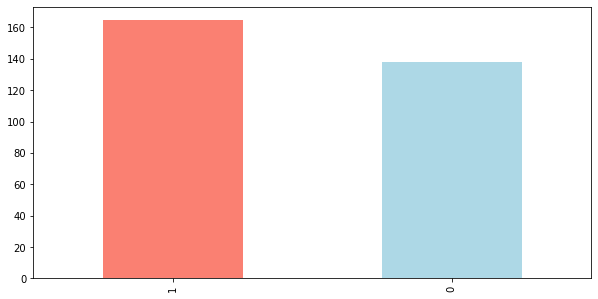

In [6]:
df.target.value_counts().plot(kind='bar', figsize=(10,5),color = ('salmon','lightblue'))

(<AxesSubplot:>,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64)

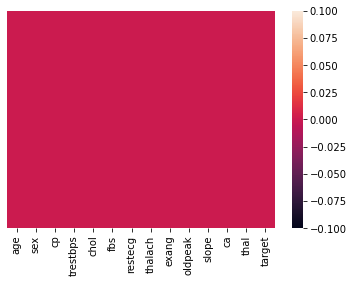

In [7]:
sns.heatmap(df.isna(),yticklabels=False), df.isna().sum()

In [8]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


### Heart Disease Frequency according to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


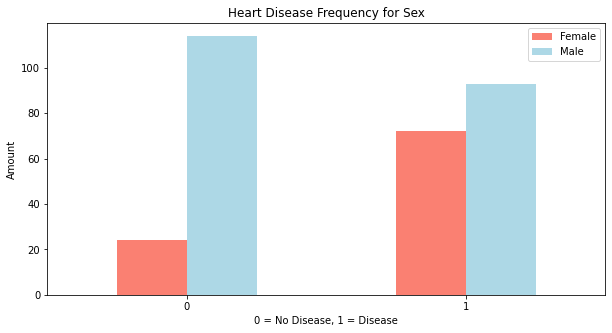

In [11]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,5),color = ('salmon','lightblue'))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [12]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

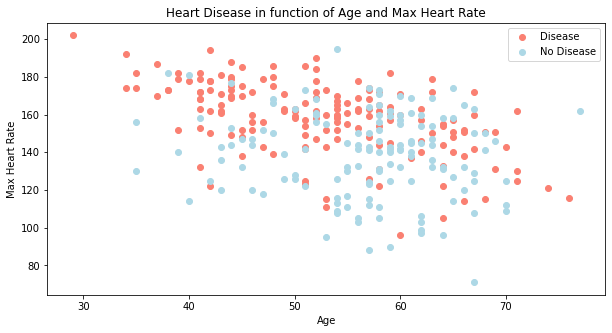

In [13]:
plt.figure(figsize=(10,5));
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon');
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue');
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

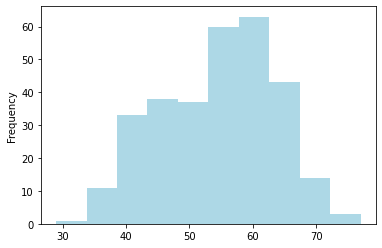

In [14]:
#  Check the distribution of the age column with a histogram
df.age.plot.hist(color='lightblue');

### Heart Disease Frequency per Chest Pain Type

chest_pain_type <br>0:typical angina<br> 1:atypical angina<br> 2:non-anginal <br>3:asymptomatic 

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


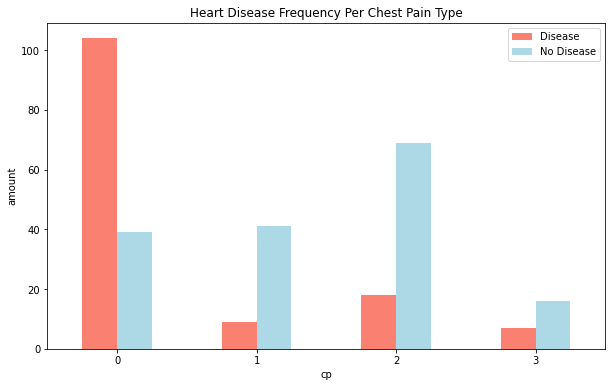

In [16]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar',figsize = (10,6),
                                   color = ['salmon','lightblue'])

plt.title("Heart Disease Frequency Per Chest Pain Type")
# plt.xlabel('Chest Pain Type')
plt.ylabel("amount")
plt.legend(["Disease","No Disease"])
plt.xticks(rotation=0);

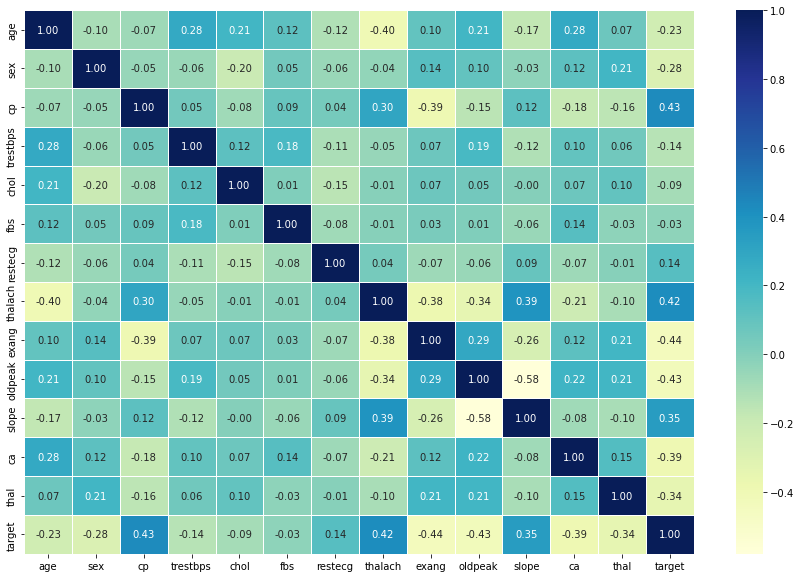

In [17]:
corr_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

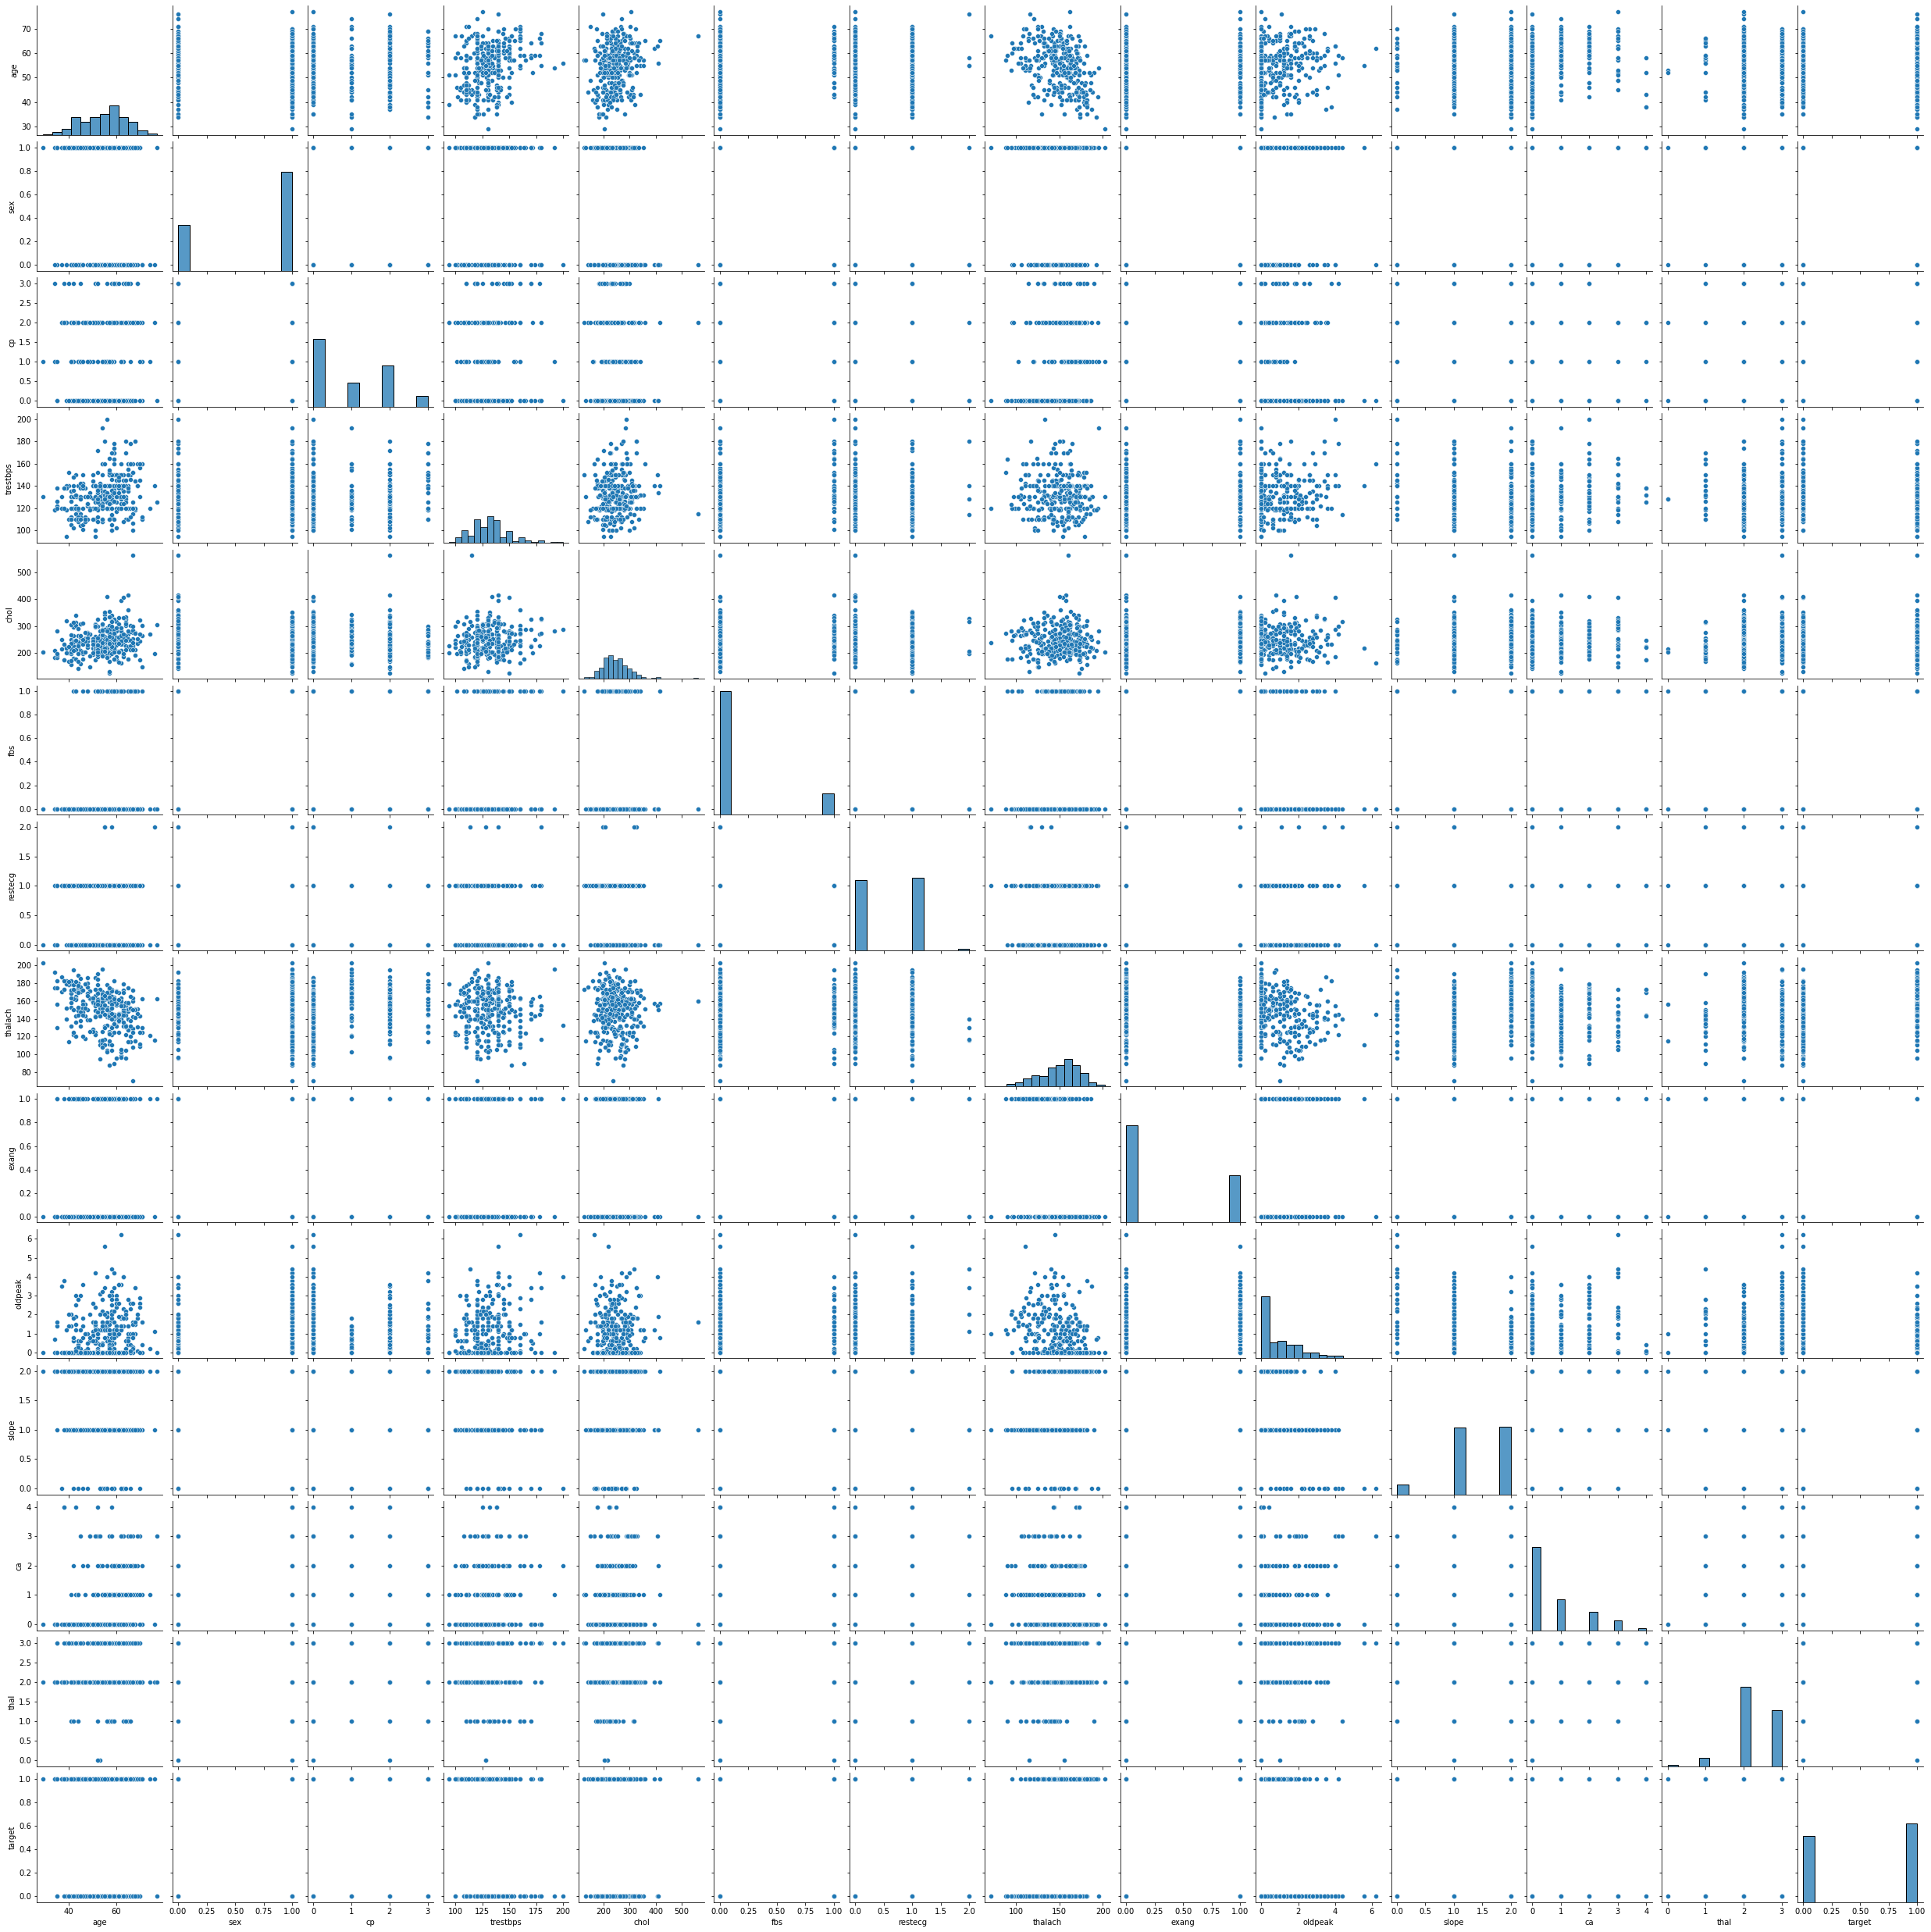

In [18]:
sns.pairplot(df);

In [19]:
df.corr().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


## Modeling 

In [20]:
X = df.drop('target',axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)
clf.score(X_test,y_test)
# 전체 변수 활용하면 82% 정도의 적중률

0.8524590163934426

In [21]:
X = df.drop(['age','sex','trestbps','chol','fbs','restecg'],axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)
clf.score(X_test,y_test)
# Corr 높은 것 추려서 적용하면 100% 적중률

1.0

다른 모델도 적용해보자 
1. Logistic Regression
2. KNN
3. Random forest classifier

In [22]:
# 모델 딕셔너리 만들기
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
# 학습 및 평가 함수 만들기
def fit_and_score(models, X, y) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    model_scores = {}
    # 모델 반복문 만들기
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test, y_test)
    return pd.DataFrame([model_scores],index = ["Accuracy"]).T 

C:\Dev\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


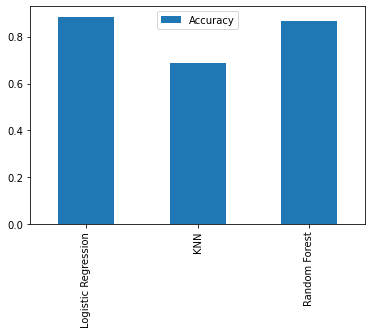

In [23]:
X = df.drop('target',axis=1)
y = df.target

fit_and_score(models, X,y).plot(kind = 'bar');

C:\Dev\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


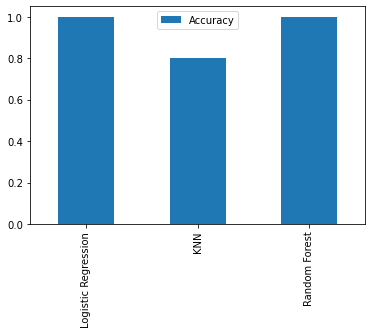

In [24]:
X = df.drop(['age','sex','trestbps','chol','fbs','restecg'],axis=1)
y = df.target

fit_and_score(models, X,y).plot(kind = 'bar');
# 100%에 달하는 정확도를 확인할 수 있음

## Tuning the model

Now we've got a baseline model, and we know a model's first predictions aren't always what we should based our next steps off.
what should do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance

In [25]:
# Let's tune KNN
train_score = []
test_score = []

# Create a lsit of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbers
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_score.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_score.append(knn.score(X_test,y_test))

In [26]:
train_score

[1.0,
 0.9586776859504132,
 0.8760330578512396,
 0.9008264462809917,
 0.8801652892561983,
 0.8801652892561983,
 0.8223140495867769,
 0.8305785123966942,
 0.7975206611570248,
 0.7851239669421488,
 0.7768595041322314,
 0.7603305785123967,
 0.7520661157024794,
 0.7396694214876033,
 0.7355371900826446,
 0.731404958677686,
 0.7231404958677686,
 0.7148760330578512,
 0.71900826446281,
 0.7231404958677686]

In [27]:
test_score

[0.8360655737704918,
 0.7868852459016393,
 0.7868852459016393,
 0.8032786885245902,
 0.8032786885245902,
 0.7868852459016393,
 0.7540983606557377,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.819672131147541,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541]

max score83.61%, in 0


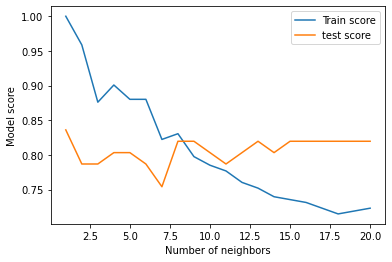

In [33]:
plt.plot(neighbors,train_score, label = 'Train score')
plt.plot(neighbors,test_score, label = 'test score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend();

print(f"max score : {max(test_score)*100:0.2f}%, in {np.argmax(test_score)}")


### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* RandomForestClassifier()

...using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [45]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Create a hyperparamer grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparamerter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [37]:
# Tune LogisticRegression
np.random.seed(42)

#setup random hyperparmeter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [39]:
rs_log_reg.score(X_test,y_test)

1.0

Now we've tuned LogisticRegression(), Let's fo the same for RandomForestClassifier()

In [46]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [48]:
rs_rf.score(X_test,y_test)

1.0

### Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)...

In [49]:
# Defferent Hyperparameters for our LogisticRegression model
log_red_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg =GridSearchCV(LogisticRegression(),
                         param_grid=log_red_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [50]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [51]:
gs_log_reg.score(X_test,y_test)

1.0

## Evaluation
* ROC curve and AUC score
* Confusion matrix 
* Classification report (Cross-validation)
* Precision
* Recall
* F1-score

To make comparisons and evaluate our trained model, first we need to make predictions.

In [53]:
# make predictions with tuned model
y_preds - gs_log_reg.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

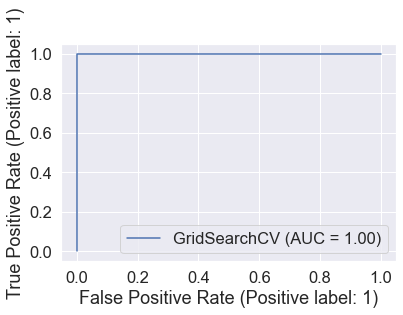

In [62]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

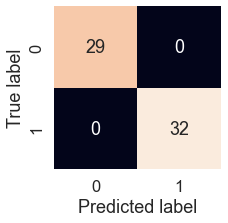

In [52]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [63]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

